In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.stats import ttest_1samp
import statsmodels.stats.proportion as sp
from collections import Counter

In [25]:
df_train = pd.read_csv("/Users/dougchang/Downloads/RapleafCompetition-master/data/training.csv",delimiter=",")
df_train.head()

,uid,behavior
0,1,0
1,1082,0
2,1222,0
3,1311,0
4,2430,1


In [24]:
df = pd.read_csv("/Users/dougchang/Downloads/RapleafCompetition-master/data/demographics.tsv",delimiter="\t")
df.head()

,uid,age,gender,location,children,home_market_value,home_owner_status,home_property_type,household_income,length_of_residence,marital_status
0,1,NaN,Male,Pittsburgh Pennsylvania United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1082,45-54,Male,United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1222,18-20,Female,Kalamazoo Michigan United States,NaN,NaN,NaN,NaN,50k-75k,NaN,NaN
3,1311,NaN,NaN,United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2430,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
df_merge = pd.merge(df_train,df,how="inner",on="uid")
df_merge.head()
#type(df_merge)

,uid,behavior,age,gender,location,children,home_market_value,home_owner_status,home_property_type,household_income,length_of_residence,marital_status
0,1,0,NaN,Male,Pittsburgh Pennsylvania United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1082,0,45-54,Male,United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1222,0,18-20,Female,Kalamazoo Michigan United States,NaN,NaN,NaN,NaN,50k-75k,NaN,NaN
3,1311,0,NaN,NaN,United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2430,1,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
total_65 = len(df.loc[df['age']=="65+"])
total_55_64 = len(df.loc[df['age']=="55-64"])
total_45_54 = len(df.loc[df['age']=="45-54"])
total_35_44 = len(df.loc[df['age']=="35-44"])
total_25_34 = len(df.loc[df['age']=="25-34"])
total_21_24 = len(df.loc[df['age']=="21-24"])
total_18_20 = len(df.loc[df['age']=="18-20"])
print("total_65:",total_65)
print("total_55_64:",total_55_64)
print("total_45_54:",total_45_54)
print("total_35_44:",total_35_44)
print("total_25_34:",total_25_34)
print("total_21_24:",total_21_24)
print("total_18_20:",total_18_20)

#print(len(df_merge.loc[df_merge['age']=="45-54"]))
#print(len(df_merge.loc[df_merge['behavior']==1]))
print("65+:",len(df_merge.loc[ (df_merge['behavior']==1) & (df_merge['age']=='65+') ]))
print("55_64:",len(df_merge.loc[ (df_merge['behavior']==1) & (df_merge['age']=='55-64') ]))
print("35_44:",len(df_merge.loc[ (df_merge['behavior']==1) & (df_merge['age']=='45-54') ]))
print("35_44:",len(df_merge.loc[ (df_merge['behavior']==1) & (df_merge['age']=='35-44') ]))
print("25_34:",len(df_merge.loc[ (df_merge['behavior']==1) & (df_merge['age']=='25-34') ]))
print("21_24:",len(df_merge.loc[ (df_merge['behavior']==1) & (df_merge['age']=='21-24') ]))
print("18_20:",len(df_merge.loc[ (df_merge['behavior']==1) & (df_merge['age']=='18-20') ]))

#hypothesis testing are all the categories proportionally equal? 
#hypothesis the 55_64 1308/27450 same as 1348/32807
import statsmodels.stats.proportion as sp
print(sp.proportions_chisquare([1308,1348],[27450,32807]))
print(sp.proportions_chisquare([953,1348],[21701,32807]))
print(sp.proportions_chisquare([534,1348],[13996,32807]))
print(sp.proportions_chisquare([267,1348],[9898,32807]))
print(sp.proportions_chisquare([40,1348],[2205,32807]))
print(sp.proportions_chisquare([28,1348],[939,32807]))
print(sp.proportions_chisquare([1348,28],[32807,939]))
print("-------------")
#pvalue <.001 so we reject the null hypothesis

print(sp.proportions_chisquare([1308,953],[27450,21701]))
print(sp.proportions_chisquare([534,953],[13996,21701]))
print(sp.proportions_chisquare([267,953],[9898,21701]))
print(sp.proportions_chisquare([40,953],[2205,21701]))
print(sp.proportions_chisquare([28,953],[939,21701]))
print("-------------")
##
print(sp.proportions_chisquare([267,534],[9898,13996]))
print(sp.proportions_chisquare([40,534],[2205,13996]))
print(sp.proportions_chisquare([28,534],[939,13996]))

print("-------------")
print(sp.proportions_chisquare([28,267],[939,9898]))
print(sp.proportions_chisquare([40,267],[2205,9898]))
#print(sp.proportions_chisquare([28,267],[939,9898]))



total_65: 32807
total_55_64: 27450
total_45_54: 21701
total_35_44: 13996
total_25_34: 9898
total_21_24: 2205
total_18_20: 939
65+: 1348
55_64: 1308
35_44: 953
35_44: 534
25_34: 267
21_24: 40
18_20: 28
(15.270809401609771, 9.31448642524168e-05, (array([[ 1308., 26142.],
       [ 1348., 31459.]]), array([[ 1209.93743465, 26240.06256535],
       [ 1446.06256535, 31360.93743465]])))
(2.580344403498141, 0.1081981182912126, (array([[  953., 20748.],
       [ 1348., 31459.]]), array([[  916.08573053, 20784.91426947],
       [ 1384.91426947, 31422.08573053]])))
(2.189784240964692, 0.13892877532886522, (array([[  534., 13462.],
       [ 1348., 31459.]]), array([[  562.79452172, 13433.20547828],
       [ 1319.20547828, 31487.79452172]])))
(41.62578511980495, 1.1052588804376142e-10, (array([[  267.,  9631.],
       [ 1348., 31459.]]), array([[  374.31846388,  9523.68153612],
       [ 1240.68153612, 31566.31846388]])))
(28.579230722405345, 8.994174596287688e-08, (array([[   40.,  2165.],
       [ 

Counter({nan: 128524, '65+': 21875, '55-64': 18326, '45-54': 14568, '35-44': 9397, '25-34': 6644, '21-24': 1431, '18-20': 633})
Counter({'65+': 21875, '55-64': 18326, '45-54': 14568, '35-44': 9397, '25-34': 6644, '21-24': 1431, '18-20': 633})


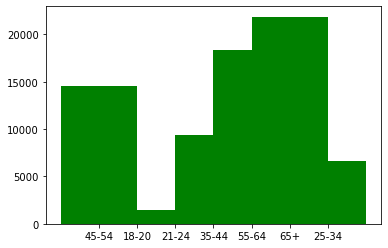

In [27]:
age_count = Counter(df_merge['age'])
print(age_count)
age_count.pop(np.nan)
print( Counter(age_count))
plt.bar(age_count.keys(), age_count.values(), width=2, color='g')
plt.show()

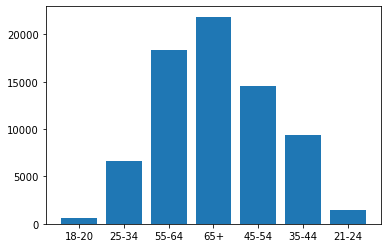

In [28]:
x=["18-20","25-34","55-64","65+","45-54","35-44","21-24"]

y = [age_count["18-20"],age_count["25-34"],age_count["55-64"],age_count["65+"],age_count["45-54"],age_count["35-44"],age_count["21-24"]]
#IF I REORDER THIS IT LOOKS LIKE A NORMAL DISTRIBUTION. 
plt.bar(x,y)
plt.show()
#do we calculate the mean of the frequency? histogram only has median, categorical data no mean, no variance
